# Project 3
### 4/5 perfect solutions required for full score

These exercises should be done on a computer using Python. 	Please submit a Jupyter-notebook, containing both your code and the report in the same file. Provide properly commented code.

Group members: Jeongmin Kim and Simon Kauppinen

In [75]:
import autograd.numpy as np
import matplotlib.pyplot as plt

# 1 Romberg's method
We are going to numerically approximate the integral
	$$
	I(f)=\int_0^1 f(x)dx
	$$
using Romberg's method. Read chapter 7.7 in SÃ¼li-Mayers for details on Romberg's method.

1. Implement your own code to approximate the integral $I(f_1)$ for the function
$$
f_1(x)=e^{-x}.
$$
How many evaluation points are required to get an absolute error smaller than $10^{-8}$?

In [76]:
#Your code
import numpy as np

def T(f,a,b,n): #composite trapezium rule
    
    """
    Inputs:
    f: the function we are integrating
    a: lower bound 
    b: upper bound
    n: number of divisions between a and b
    """
    
    h=(b-a)/n #step size
    x=a
    v=(f(a)+f(b))*0.5
    for i in range(1,n):
        x=x+h
        v+=f(x)
    result=h*v
    return result

def romberg(f,a,b,k): #creates the Romberg table
    
    """
    Inputs:
    f: the function we are integrating
    a: lower bound
    b: upper bound
    k: number of rows for the Romberg table
    """
    
    M=np.zeros((k,k)) #creates kxk zero matrix (base for the Romberg table)
    for i in range(0,k):
        M[i,0]=T(f,a,b,2**(i)) #computes the first column of the Romberg table
        for j in range(0,i): #computes the rest recursively
            num=(4**(j+1))*M[i,j]-M[i-1,j]
            den=(4**(j+1))-1
            M[i,j+1]=num/den 
    return M #returns the final Romberg table

def func1(x): #given function
    f=np.exp(-x)
    return f

real_value1=1-np.exp(-1) #value of the integration


for i in range (1,5):
    k=i
    M=romberg(func1,0,1,k)
    print(f"Romberg table for {2**(k-1)+1} evaluation points:")
    print(M)
    solution=M[k-1,k-1]
    error=abs(real_value1-solution)
    print(f"Absolute error: {error}")
    print(f"Is the absolute error smaller than 10^(−8)?: {error<(10**(-8))}")
    print()

print("As it is shown above, (2^3)=8 divisions are required to get an absolute error smaller than 10^(−8) so 9 evaluation points are required.")

Romberg table for 2 evaluation points:
[[0.68393972]]
Absolute error: 0.0518191617571635
Is the absolute error smaller than 10^(−8)?: False

Romberg table for 3 evaluation points:
[[0.68393972 0.        ]
 [0.64523519 0.63233368]]
Absolute error: 0.00021312117510496886
Is the absolute error smaller than 10^(−8)?: False

Romberg table for 5 evaluation points:
[[0.68393972 0.         0.        ]
 [0.64523519 0.63233368 0.        ]
 [0.63540943 0.63213418 0.63212088]]
Absolute error: 3.1617976581355123e-07
Is the absolute error smaller than 10^(−8)?: False

Romberg table for 9 evaluation points:
[[0.68393972 0.         0.         0.        ]
 [0.64523519 0.63233368 0.         0.        ]
 [0.63540943 0.63213418 0.63212088 0.        ]
 [0.63294342 0.63212141 0.63212056 0.63212056]]
Absolute error: 1.2341827559936291e-10
Is the absolute error smaller than 10^(−8)?: True

As it is shown above, (2^3)=8 divisions are required to get an absolute error smaller than 10^(−8) so 9 evaluation points

2. Now consider the function
$$
f_2(x)=e^{-|x-\frac{1}{3}|}.
$$
How many evaluation points are required to get an absolute value less than $10^{-8}$?

In [77]:
#Your code

def func2(x): #given function
    frac=x-(1/3)
    f=np.exp(-np.abs(frac))
    return f

real_value2=-np.exp(-1/3)-np.exp(-2/3)+2 #value of the integration


for i in range (1,5):
    k=i
    M=romberg(func2,0,1,k)
    print(f"Romberg table for {2**(k-1)+1} evaluation points:")
    print(M)
    solution=M[k-1,k-1]
    error=abs(real_value2-solution)
    print(f"Absolute error: {error}")
    print(f"Is the absolute error smaller than 10^(−8)?: {error<(10**(-8))}")
    print()
    
print("As it is shown above, (2^3)=8 divisions are required to get an absolute error smaller than 10^(−8) so 9 evaluation points are required.")

Romberg table for 2 evaluation points:
[[0.61497421]]
Absolute error: 0.1550773555904279
Is the absolute error smaller than 10^(−8)?: False

Romberg table for 3 evaluation points:
[[0.61497421 0.        ]
 [0.73072797 0.76931255]]
Absolute error: 0.0007390155321457259
Is the absolute error smaller than 10^(−8)?: False

Romberg table for 5 evaluation points:
[[0.61497421 0.         0.        ]
 [0.73072797 0.76931255 0.        ]
 [0.76018525 0.77000434 0.77005046]]
Absolute error: 1.1132771231547878e-06
Is the absolute error smaller than 10^(−8)?: False

Romberg table for 9 evaluation points:
[[0.61497421 0.         0.         0.        ]
 [0.73072797 0.76931255 0.         0.        ]
 [0.76018525 0.77000434 0.77005046 0.        ]
 [0.76758276 0.7700486  0.77005155 0.77005157]]
Absolute error: 4.3529335691516735e-10
Is the absolute error smaller than 10^(−8)?: True

As it is shown above, (2^3)=8 divisions are required to get an absolute error smaller than 10^(−8) so 9 evaluation points 

3. Use the Gauss-Legendre quadrature to approximate the integrals $I(f_1)$ and $I(f_2)$. How many evaluation points are required to get absolute errors les than $10^{-8}$? You can use existing libraries for Gauss-Legendre, for example numpy.polynomial.legendre.leggauss or scipy.special.roots_legendre.

In [78]:
#Your code   
from scipy.special import roots_legendre

def GL(f,a,b,n):
    
    """
    Inputs:
    f: the function we are integrating
    a: lower bound
    b: upper bound
    n: number of nodes
    """
    
    x,w=roots_legendre(n) #assigns nodes and its corresponding weights
    t=(b-a)/2*x+(a+b)/2 #translates the interval from [-1,1] to [a,b]
    G=(b-a)/2*sum(w*f(t)) #computes the value

    return G

In [79]:
#first function

def f1(x): #first function
    return np.exp(-x)

real_value1=1-np.exp(-1) #value of the first integration


for i in range (1,5):
    k=i
    M=GL(f1,0,1,k)
    error=abs(real_value1-M)
    print(f"Number of nodes: {k}")
    print(f"Absolute error: {error}")
    print(f"Is the absolute error smaller than 10^(−8)?: {error<(10**(-8))}")
    print()

print("As it is shown above, 4 evaluation points are required to get an absolute error smaller than 10^(−8)")

Number of nodes: 1
Absolute error: 0.02558989911592424
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 2
Absolute error: 0.00014179929671220837
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 3
Absolute error: 3.031644897344421e-07
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 4
Absolute error: 3.4321945285853417e-10
Is the absolute error smaller than 10^(−8)?: True

As it is shown above, 4 evaluation points are required to get an absolute error smaller than 10^(−8)


In [80]:
#second function

def f2(x): #second function
    frac=x-(1/3)
    f=np.exp(-np.abs(frac))
    return f

real_value2=-np.exp(-1/3)-np.exp(-2/3)+2 #value of the second integration


for i in range (1,500):
    k=i
    M=GL(f2,0,1,k)
    error=abs(real_value2-M)
    print(f"Number of nodes: {k}")
    print(f"Absolute error: {error}")
    tol=error<(10**(-8))
    print(f"Is the absolute error smaller than 10^(−8)?: {tol}")
    if tol==True:
        break
    print()

print("As it is shown above, 469 evaluation points are required to get an absolute error smaller than 10^(−8)")

Number of nodes: 1
Absolute error: 0.07643015449699542
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 2
Absolute error: 0.010365558868381974
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 3
Absolute error: 0.011426702259136001
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 4
Absolute error: 0.01710742062819748
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 5
Absolute error: 0.005827420837339781
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 6
Absolute error: 0.0006414851605552885
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 7
Absolute error: 0.000312740704348613
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 8
Absolute error: 0.0022852979739875767
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 9
Absolute error: 0.003415639808599491
Is the absolute error smaller than 10^(−8)?: False

Number of nodes: 10
Absolute

# 2 Explicit midpoint Runge-Kutta
We are going to numerically solve the initial value problem
$$
\frac{dy}{dt}=f(t,y(t)), \quad y(t_0)=y_0,
$$
using the explicit midpoint Rune-Kutta method. For a given step size $h$, the next step is given by
$$
y_{n+1}=y_n+h\cdot f(t_n+\frac{h}{2},y_n+\frac{1}{2}f(t_n,y_n) ).
$$

1. Use the explicit midpoint Runge-Kutta method to solve the inital value problem:
\begin{align*}
\frac{dy}{dt}=&-3yz, \quad y_0=2, \\
\frac{dz}{dt}=&y, \quad z_0=1.
\end{align*}
Plot the solution for $0 \leq t \leq 10$, with $h=10^{-4}$.

Note: the midpoint rule given above is missing a h in the second coordinate of f. Here we solve this problem assuming it was meant to be $y_{n+1}=y_n+h\cdot f(t_n+\frac{h}{2},y_n+\frac{h}{2}f(t_n,y_n)).$

From this we get that $y_{n+1}=y_n+h\cdot k_2|_{t_n} $    
We rewrite the system as a vector equation: $v_{n+1} = v_{n} + h\cdot k_2, \quad \quad v = (y,z)^T$ and $ f(t,v) = f(t,\begin{pmatrix} y \\ z \end{pmatrix})) = \begin{pmatrix} \frac{dy}{dt} \\\\ \frac{dz}{dt} \end{pmatrix}$
$$\begin{align*}
k_1 &= f(t,\begin{pmatrix} y \\ z \end{pmatrix}) = \begin{pmatrix} -3yz \\ y \end{pmatrix} \\
k_2 &= f(t + \frac{h}{2}, \begin{pmatrix} y \\ z \end{pmatrix} + \frac{h}{2}k_1) \end{align*}$$



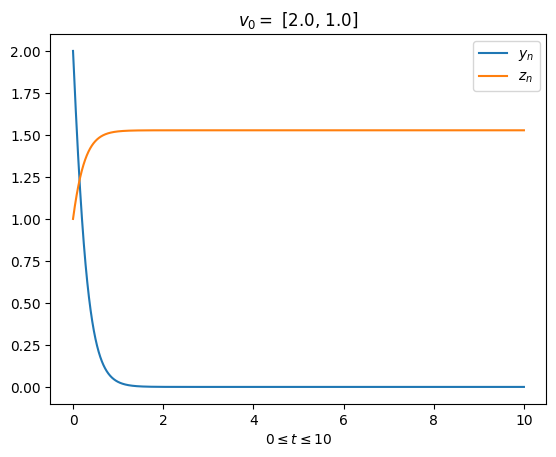

In [81]:
import numpy as np
from matplotlib import pyplot as plt

h = 10**-4

def f(v):
    return np.array([-3*v[0]*v[1], v[0]])
def k1(v):
    return f(v)
def k2(v):
    return f(v + h/2 *k1(v))

def iter(v0):
    M = int(10 / h) # Number steps 
    v = np.zeros((M+1,2))
    v[0] = v0
    for i in range(M):
        v[i+1] = v[i] + h*k2(v[i])

    t = [i*h for i in range(M+1)]
    
    plt.plot(t,v)
    plt.legend(labels = [r"$y_n$",r"$z_n$"])
    plt.xlabel(r"$0 \leq t \leq 10$")
    plt.title(rf"$v_0 = $ {v0} ")
    plt.show()

iter([2.0,1.0])

2. Solve the system of equations for different initial values $(y_0,z_0)$. Plot the solutions. Comment on the results.

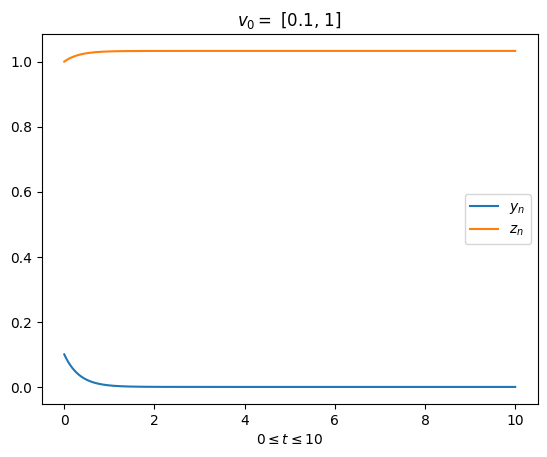

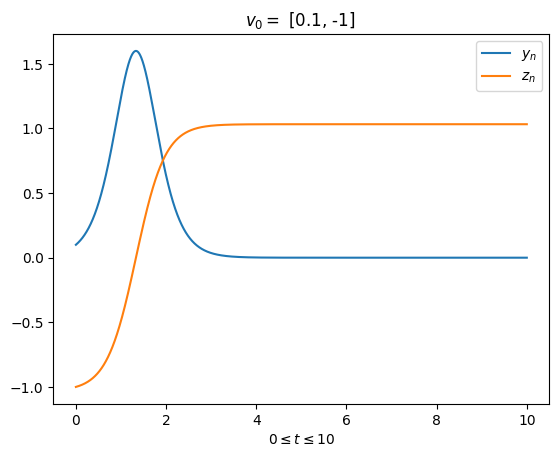

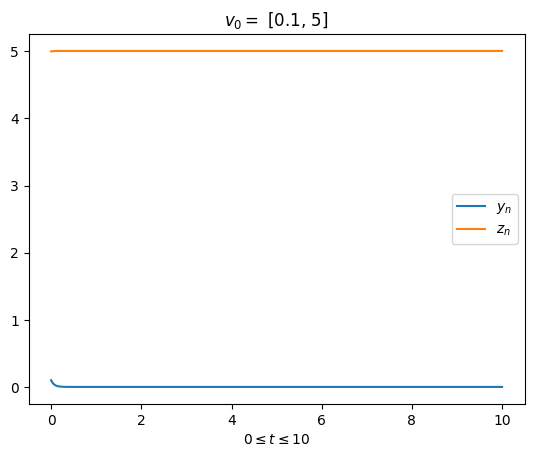

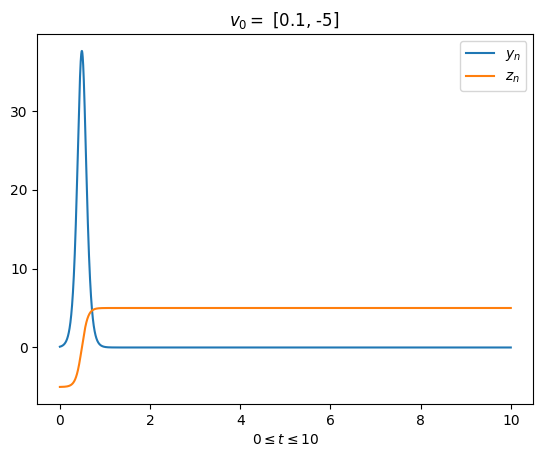

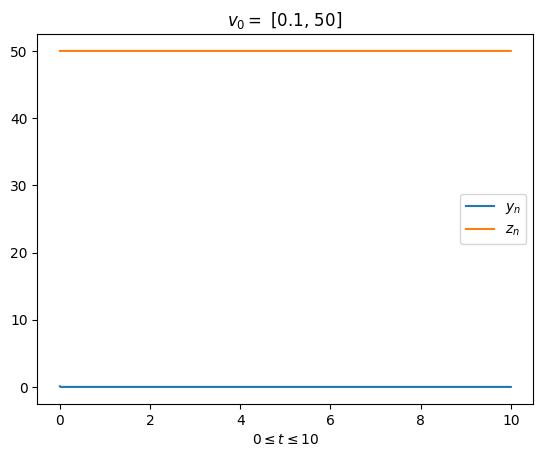

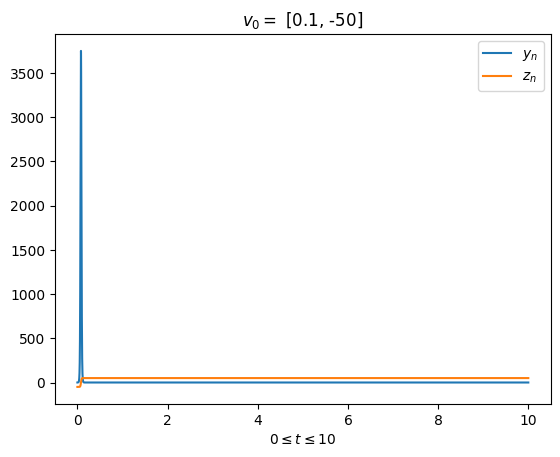

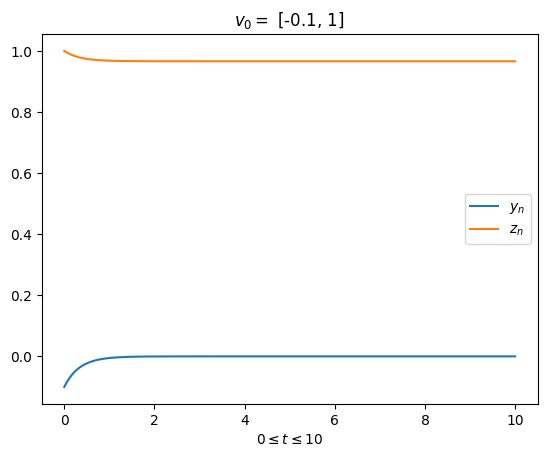

C:\Users\sbeki\AppData\Local\Temp\ipykernel_16856\988207443.py:7: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-3*v[0]*v[1], v[0]])


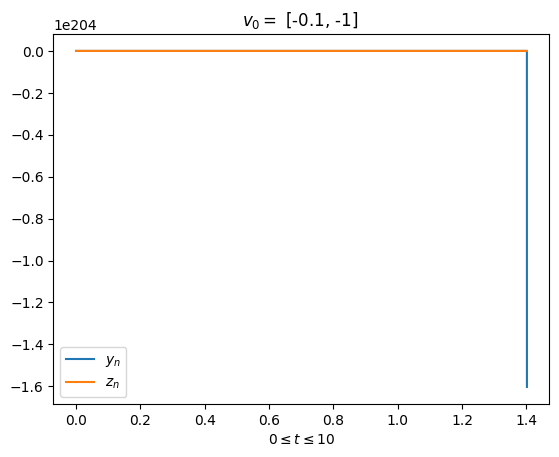

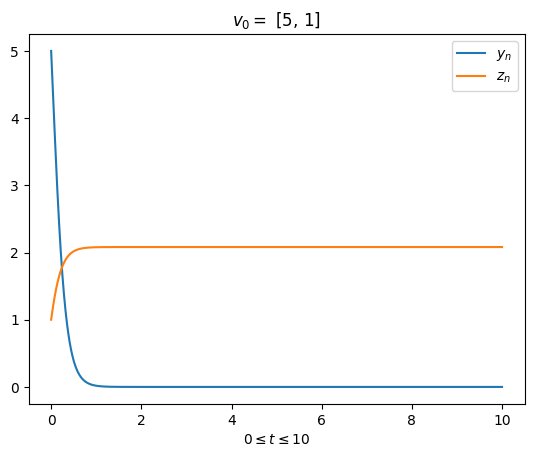

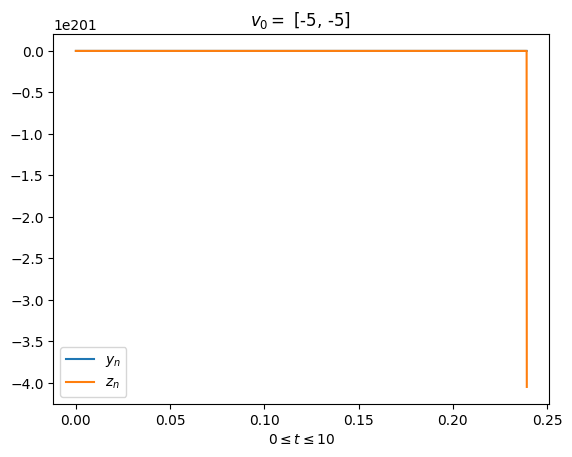

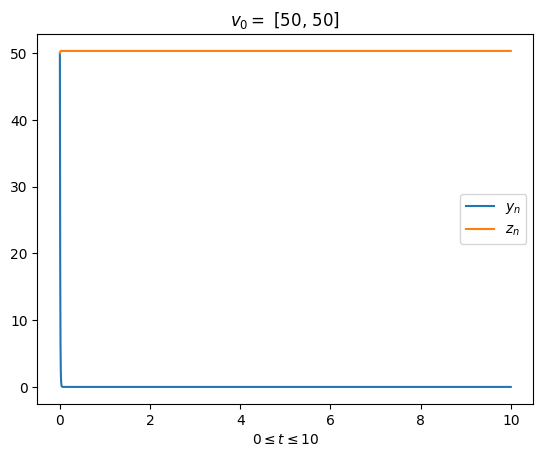

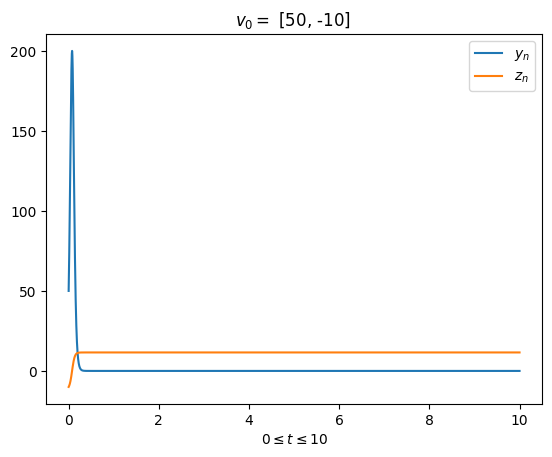

In [82]:
iter([0.1,1])
iter([0.1,-1])
iter([0.1,5])
iter([0.1,-5])
iter([0.1,50])
iter([0.1,-50])
iter([-0.1,1])
iter([-0.1,-1])
iter([5,1])
iter([-5,-5])
iter([50,50])
iter([50,-10])


For the first six graphs we fixed $y_0$ close to 0 while changing the value and sign of $z_0$. These graphs suggest that 
that the value and sign of $z_0$ does not effect the convergence of $y_n$ when $y_n$ is small and positive. For the remaining six we tried different combinations of signs and sizes
from which we observe that the value of $y_n$ increases
proportionally to the absolute value of $z_n$ before converging to 0 for some t < 3 unless $y_0$ and $z_0$ are both negative numbers, in which case both $y_n$ and $z_n$ diverge to infinity.
The also notice that $z_n$ remains relatively close its initial value and converges around the same time that $y_n$ converges to 0.


